# Standarization


# also known as  Z- score Normalization

Standardization is a method of feature scaling in which data values are rescaled to fit the distribution between 0 and 1 using mean and standard deviation as the base to find specific values.

Standardization is often referred to as "Z-score normalization" because it involves transforming data into a standard normal distribution with a mean of 0 and a standard deviation of 1. 

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv('Social_Network_Ads.csv')

In [6]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
128,15722758,Male,30,17000,0
357,15671387,Female,41,72000,0
114,15739160,Male,42,80000,0
207,15794566,Female,52,114000,0
388,15672330,Male,47,34000,1


In [8]:
df=df.iloc[:,2:]

In [9]:
df.sample(5)

,Age,EstimatedSalary,Purchased
219,59,143000,1
366,58,47000,1
285,37,93000,1
66,24,19000,0
178,24,23000,0


In [10]:
X=df.drop("Purchased",axis=1)
y=df.Purchased

In [13]:
print(X.shape)
print(y.shape)

(400, 2)
(400,)


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [17]:
X_train.shape,y_train.shape

((280, 2), (280,))

# Standard Scalar

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_trained_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [39]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [40]:
X_trained_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [41]:
X_trained_scaled=pd.DataFrame(X_trained_scaled,columns=X_train.columns)

In [42]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [45]:
np.round(X_trained_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


In [47]:
np.round(X_train.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,38.0,69807.0
std,10.0,34641.0
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


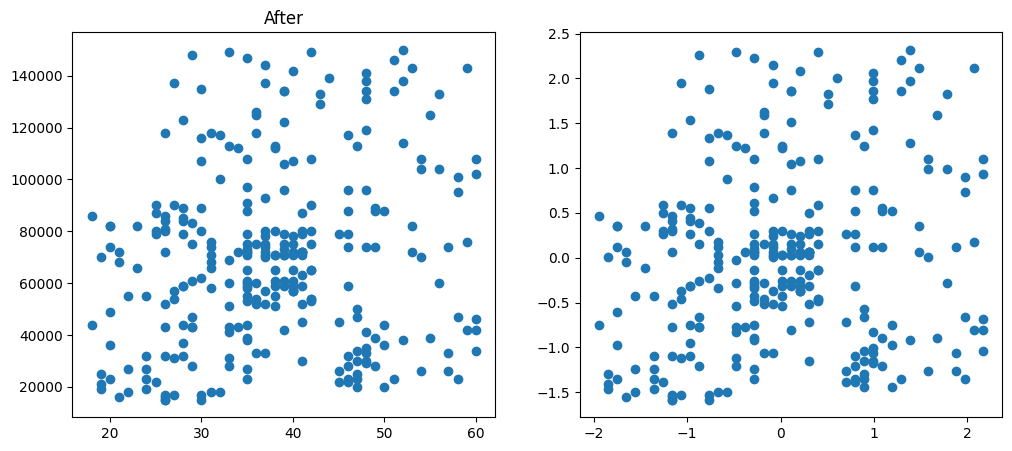

In [54]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before")
ax2.scatter(X_trained_scaled['Age'], X_trained_scaled['EstimatedSalary'])
ax1.set_title("After")
plt.show()